<a href="https://colab.research.google.com/github/manishmawatwal/DataScience/blob/main/Bajaj_Finserv_Stock_Analysis_with_SARIMAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import warnings 
warnings.filterwarnings('ignore')
import datetime as dt
from pandas.tseries.offsets import DateOffset
import statsmodels.api as sm
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] =(9,5)
matplotlib.rcParams['figure.facecolor']= '#00000000'

In [2]:
# upload files on google colab drive
from google.colab import files
uploaded = files.upload()

Saving BAJAJFINSV.csv to BAJAJFINSV.csv


In [126]:
bajaj_df = pd.read_csv("BAJAJFINSV.csv")
bajaj_df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,3145446,1.726368e+14,NaN,908264,0.2888
1,2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.1,564.0,554.65,572.15,4349144,2.488370e+14,NaN,677627,0.1558
2,2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.0,643.0,640.95,618.37,4588759,2.837530e+14,NaN,774895,0.1689
3,2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.0,634.5,632.40,659.60,4522302,2.982921e+14,NaN,1006161,0.2225
4,2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.3,647.0,644.00,636.41,3057669,1.945929e+14,NaN,462832,0.1514


Column Description
1. Prev Close - Previous day's close price
2. Open and Close - indicates opening and closing price on a particular day
3. Low and High - indicates the lowest and height price on a particular day
4. VWAP - volume weighted average price
5. Last - last traded price on a particular day
6. Volume - indicates total volume of stocks traded on particular day
7. Turnover - indicates total value of stocks traded during a particular period

In [16]:
bajaj_df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
3196,2021-04-26,BAJAJFINSV,EQ,9916.65,9992.0,10125.00,9902.20,10000.85,10001.75,9995.72,419596,4.194163e+14,45113.0,77816,0.1855
3197,2021-04-27,BAJAJFINSV,EQ,10001.75,10000.0,10133.00,9964.70,10133.00,10091.35,10036.76,342847,3.441072e+14,40414.0,77723,0.2267
3198,2021-04-28,BAJAJFINSV,EQ,10091.35,10200.0,10615.95,10151.15,10480.00,10489.30,10445.96,1113881,1.163556e+15,126354.0,133587,0.1199
3199,2021-04-29,BAJAJFINSV,EQ,10489.30,10540.0,11300.00,10520.00,11175.45,11176.55,10980.40,1696498,1.862822e+15,165425.0,195324,0.1151
3200,2021-04-30,BAJAJFINSV,EQ,11176.55,11000.0,11225.00,10868.70,11021.00,11041.65,11081.78,835355,9.257223e+14,85986.0,129995,0.1556


List of analysis performed in the notebook¶
1. Calculations of Returns
2. Cumulative returns
3. Moving averages
4. Plotting with moving averages
5. Analysis with Dates
6. Volume analysis
7. Deliverables analysis

In [17]:
bajaj_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3201 entries, 0 to 3200
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3201 non-null   object 
 1   Symbol              3201 non-null   object 
 2   Series              3201 non-null   object 
 3   Prev Close          3201 non-null   float64
 4   Open                3201 non-null   float64
 5   High                3201 non-null   float64
 6   Low                 3201 non-null   float64
 7   Last                3201 non-null   float64
 8   Close               3201 non-null   float64
 9   VWAP                3201 non-null   float64
 10  Volume              3201 non-null   int64  
 11  Turnover            3201 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3201 non-null   int64  
 14  %Deliverble         3201 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 375.2

Data considerations

We will consider last three years of data for this analysis from 30-April-2019-2021

We need to remove columns which are not useful for analysis, handling missing values, incorrect values and invalid entries.

In [18]:
#Series and Symbol columns are for no use in the analysis. Se wee need to drop these
bajaj_df = bajaj_df.drop(['Series','Symbol'], axis=1)
bajaj_df.head()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2008-05-26,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,3145446,1.726368e+14,NaN,908264,0.2888
1,2008-05-27,509.10,505.00,610.95,491.1,564.0,554.65,572.15,4349144,2.488370e+14,NaN,677627,0.1558
2,2008-05-28,554.65,564.00,665.60,564.0,643.0,640.95,618.37,4588759,2.837530e+14,NaN,774895,0.1689
3,2008-05-29,640.95,656.65,703.00,608.0,634.5,632.40,659.60,4522302,2.982921e+14,NaN,1006161,0.2225
4,2008-05-30,632.40,642.40,668.00,588.3,647.0,644.00,636.41,3057669,1.945929e+14,NaN,462832,0.1514


In [19]:
bajaj_df.shape

(3201, 13)

In [20]:
bajaj_df.isnull().sum()

Date                    0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                745
Deliverable Volume      0
%Deliverble             0
dtype: int64

In [21]:
# droping NA values
bajaj_df = bajaj_df.dropna()
bajaj_df = bajaj_df.reset_index()
bajaj_df.isnull().sum()

index                 0
Date                  0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

Exploratory Data Analysis

In this part of the analysis, we will calculate

1. Sum
2. mean
3. Standard deviation
4. Ranges
5. Computation on numerical columns
6. Relationship between columns using plots, bar charts
7. Using histograms for distributions of columns
8. Finding insights from the analysis

In [27]:
start_date = "2019-04-30"
end_date = "2021-04-30"

mask = (bajaj_df['Date'] >= start_date) & (bajaj_df['Date'] <= end_date)
# changing the data frame
bajaj_df1 = bajaj_df.loc[mask]
bajaj_df1 = bajaj_df1.reset_index()
bajaj_df1 = bajaj_df1.drop(['index'], axis=1)
bajaj_df1

,level_0,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,1959,2019-04-30,7721.25,7721.25,7730.00,7449.15,7515.00,7520.45,7582.77,253399,1.921466e+14,22564.0,99859,0.3941
1,1960,2019-05-02,7520.45,7522.00,7625.00,7500.85,7595.00,7578.85,7581.62,103551,7.850848e+13,13008.0,12542,0.1211
2,1961,2019-05-03,7578.85,7595.00,7669.90,7590.00,7610.00,7624.20,7633.59,80422,6.139088e+13,10009.0,14642,0.1821
3,1962,2019-05-06,7624.20,7580.00,7699.75,7557.60,7684.80,7667.95,7645.28,118824,9.084427e+13,13727.0,21265,0.1790
4,1963,2019-05-07,7667.95,7684.00,7698.75,7525.00,7553.00,7561.95,7609.73,103553,7.880102e+13,15771.0,24334,0.2350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,2451,2021-04-26,9916.65,9992.00,10125.00,9902.20,10000.85,10001.75,9995.72,419596,4.194163e+14,45113.0,77816,0.1855
493,2452,2021-04-27,10001.75,10000.00,10133.00,9964.70,10133.00,10091.35,10036.76,342847,3.441072e+14,40414.0,77723,0.2267
494,2453,2021-04-28,10091.35,10200.00,10615.95,10151.15,10480.00,10489.30,10445.96,1113881,1.163556e+15,126354.0,133587,0.1199
495,2454,2021-04-29,10489.30,10540.00,11300.00,10520.00,11175.45,11176.55,10980.40,1696498,1.862822e+15,165425.0,195324,0.1151


In [28]:
# removing extra colum level_0
bajaj_df1 = bajaj_df1.drop(['level_0'], axis=1)
bajaj_df1.index

RangeIndex(start=0, stop=497, step=1)

In [29]:
bajaj_df1.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,4.970000e+02,4.970000e+02,497.000000,497.000000,497.000000
mean,7698.384708,7711.385513,7831.408451,7585.501207,7706.156942,7705.065594,7710.102817,6.263482e+05,4.460238e+14,63093.219316,117631.323944,0.210097
std,1671.993304,1667.603402,1668.050425,1679.892763,1676.673453,1678.705143,1675.441006,5.492713e+05,3.765258e+14,48930.583680,96743.483115,0.084568
min,4097.250000,4100.000000,4276.950000,3985.300000,4095.200000,4097.250000,4144.520000,4.175500e+04,3.346669e+13,5011.000000,9700.000000,0.063700
25%,6269.100000,6285.000000,6375.000000,6188.400000,6266.000000,6269.100000,6280.590000,2.697180e+05,2.147026e+14,30144.000000,53879.000000,0.150400
50%,8121.300000,8141.000000,8245.000000,8035.000000,8104.000000,8125.200000,8145.260000,4.698110e+05,3.422421e+14,48856.000000,91468.000000,0.195400
75%,9095.650000,9135.000000,9250.000000,9015.200000,9100.000000,9104.250000,9133.130000,7.864960e+05,5.286955e+14,80649.000000,148453.000000,0.256400
max,11176.550000,11000.000000,11300.000000,10868.700000,11175.450000,11176.550000,11081.780000,4.110412e+06,3.394379e+15,312959.000000,875036.000000,0.595500


Stock price plotting. Open, close

<function matplotlib.pyplot.show>

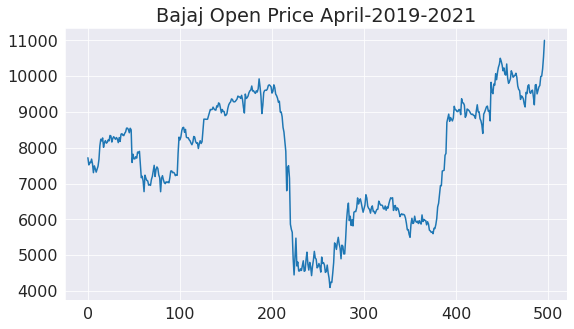

In [30]:
bajaj_df1['Open'].plot()
plt.title("Bajaj Open Price April-2019-2021")
plt.show

<function matplotlib.pyplot.show>

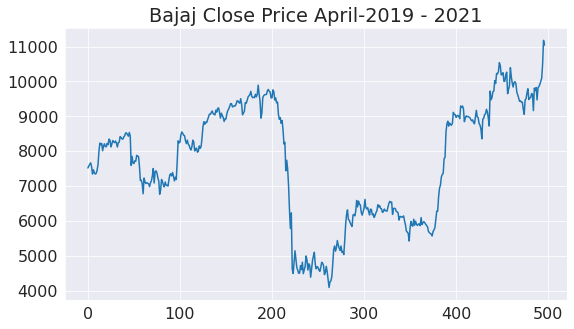

In [ ]:
bajaj_df1['Close'].plot()
plt.title("Bajaj Close Price April-2019 - 2021")
plt.show

In [31]:
AvgHigh = bajaj_df1.describe()['High']['mean']
AvgLow = bajaj_df1.describe()['Low']['mean']
AvgVolume = bajaj_df1.describe()['Volume']['mean']
AvgDeliverable_volume = bajaj_df1.describe()['Deliverable Volume']['mean']

print("Average High Bajaj Finserv: ",AvgHigh,
     "\nAverage Low Bajaj Finserv: ",AvgLow,
     "\nAverage Volume for Bajaj Finserv: ", AvgVolume,
     "\nAverage Deliverable Volume of Bajaj Finserv: ", AvgDeliverable_volume)

Average High Bajaj Finserv:  7831.408450704228 
Average Low Bajaj Finserv:  7585.50120724346 
Average Volume for Bajaj Finserv:  626348.2394366197 
Average Deliverable Volume of Bajaj Finserv:  117631.32394366198


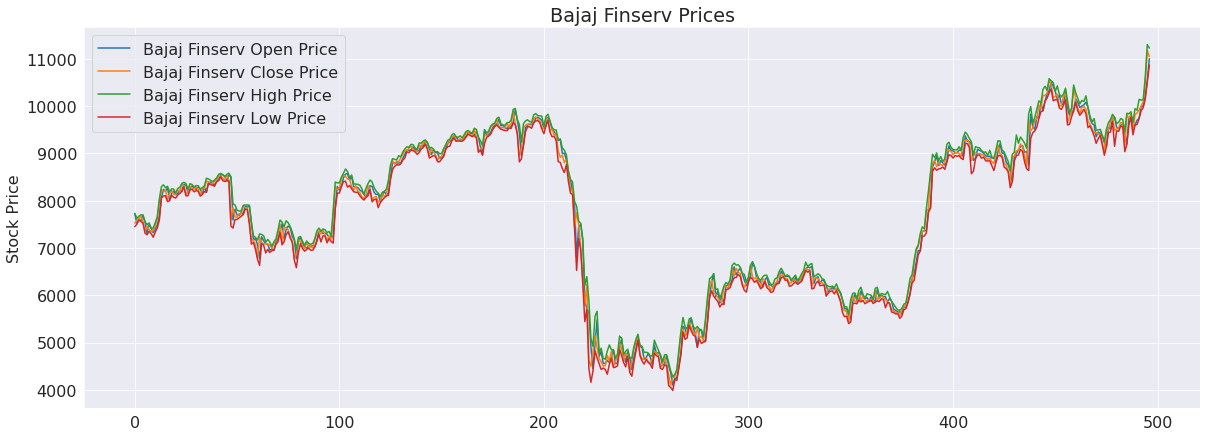

In [32]:
plt.figure(figsize=(20,7));
bajaj_df1['Open'].plot(label = 'Bajaj Finserv Open Price')
bajaj_df1['Close'].plot(label = 'Bajaj Finserv Close Price')
bajaj_df1['High'].plot(label= 'Bajaj Finserv High Price')
bajaj_df1['Low'].plot(label= 'Bajaj Finserv Low Price')
plt.legend()
plt.title('Bajaj Finserv Prices')
plt.ylabel("Stock Price")
plt.show()

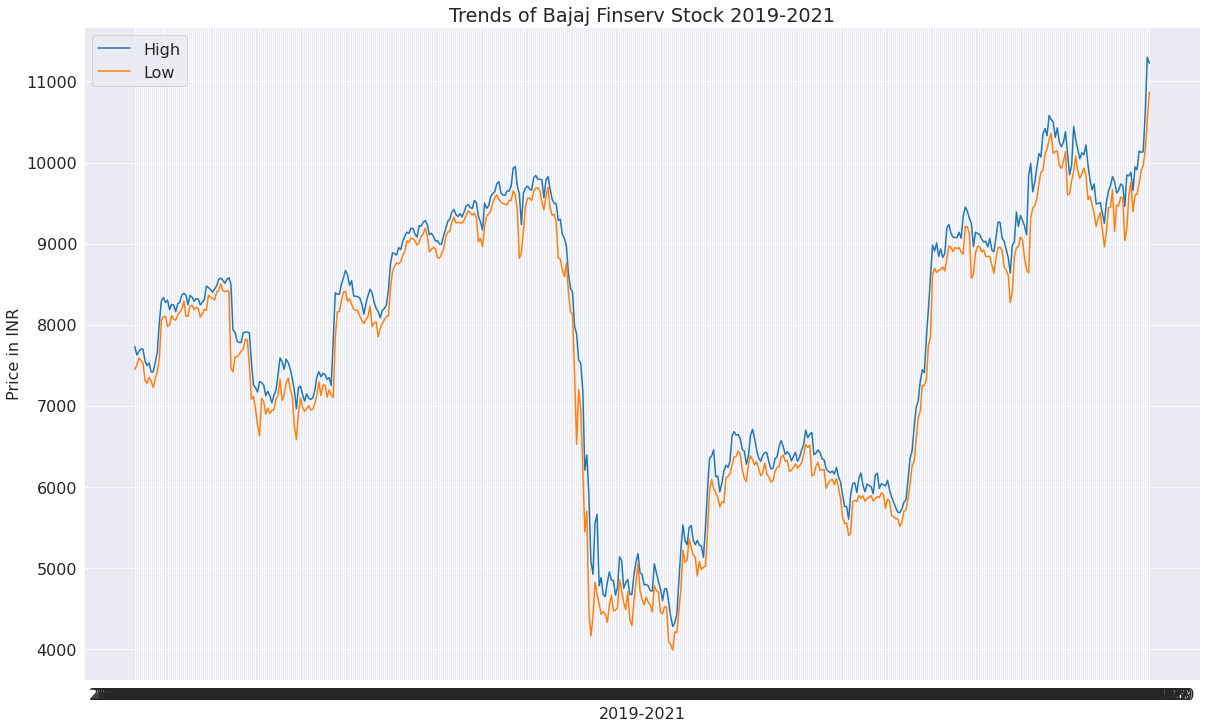

In [33]:
plt.figure(figsize=(20,12));
plt.plot(bajaj_df1.Date, bajaj_df1.High);
plt.plot(bajaj_df1.Date, bajaj_df1.Low);
plt.title("Trends of Bajaj Finserv Stock 2019-2021");
plt.xlabel('2019-2021');
plt.ylabel('Price in INR');
plt.legend(['High','Low']);

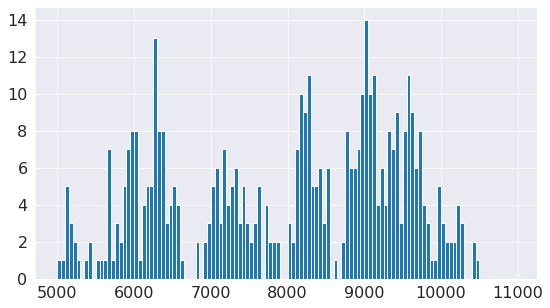

In [46]:
plt.hist(bajaj_df1.VWAP, bins=np.arange(5000,11000,50));

A histogram is a graph that represents the probability distribution of a dataset. The heights of the bars indicate the frequencies or probabilities for the different values.

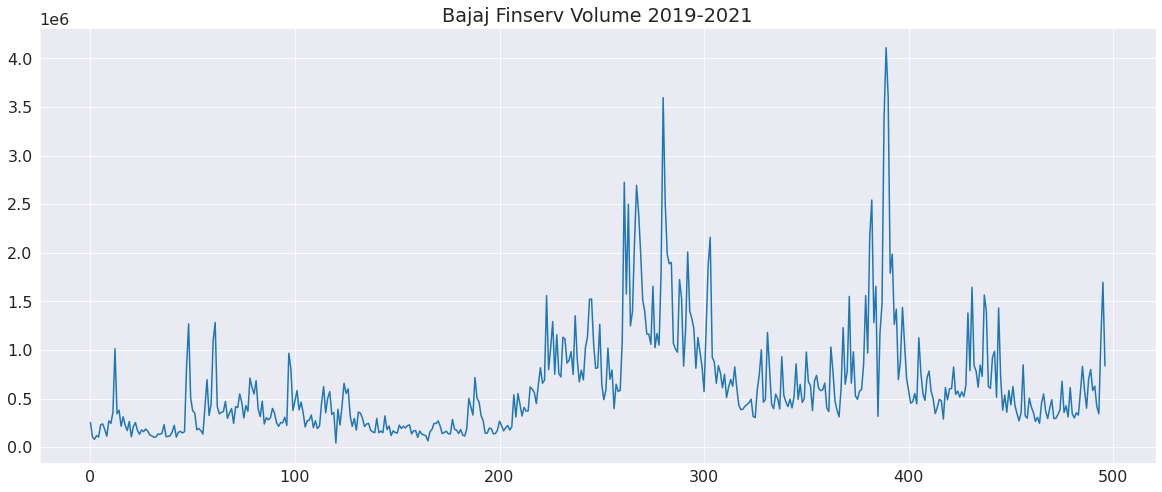

In [47]:
bajaj_df1['Volume'].plot(figsize=(20,8))
plt.title("Bajaj Finserv Volume 2019-2021")
plt.show()

In [48]:
# maximum volume in a day
bajaj_df1.iloc[[bajaj_df1['Volume'].argmax()]]

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
389,2020-11-20,7823.4,7843.0,8588.65,7843.0,8548.8,8542.6,8258.0,4110412,3.394379e+15,312959.0,439796,0.107


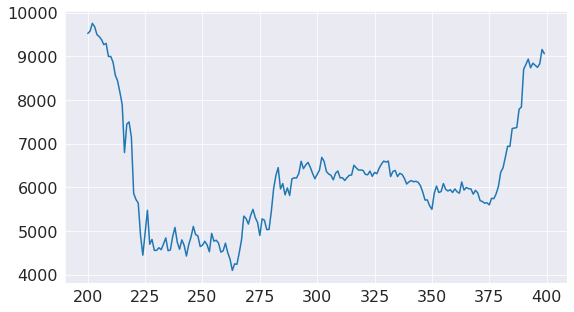

In [49]:
spike = bajaj_df1.iloc[200:400]
spike['Open'].plot()

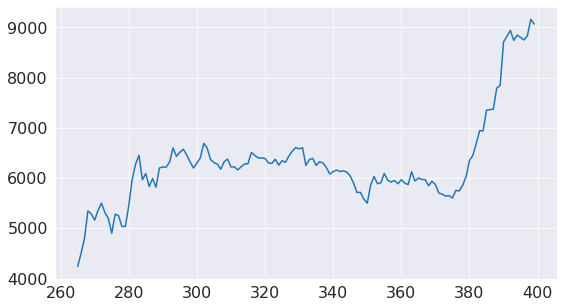

In [50]:
bajaj_df1.iloc[265:400]['Open'].plot()

In [52]:
bajaj_df1['Intraday Volume'] = bajaj_df1['Volume'] - bajaj_df1['Deliverable Volume']
bajaj_df1.head()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Intraday Volume
0,2019-04-30,7721.25,7721.25,7730.00,7449.15,7515.0,7520.45,7582.77,253399,1.921466e+14,22564.0,99859,0.3941,153540
1,2019-05-02,7520.45,7522.00,7625.00,7500.85,7595.0,7578.85,7581.62,103551,7.850848e+13,13008.0,12542,0.1211,91009
2,2019-05-03,7578.85,7595.00,7669.90,7590.00,7610.0,7624.20,7633.59,80422,6.139088e+13,10009.0,14642,0.1821,65780
3,2019-05-06,7624.20,7580.00,7699.75,7557.60,7684.8,7667.95,7645.28,118824,9.084427e+13,13727.0,21265,0.1790,97559
4,2019-05-07,7667.95,7684.00,7698.75,7525.00,7553.0,7561.95,7609.73,103553,7.880102e+13,15771.0,24334,0.2350,79219


Pie chart shows percantages of long term and short term investors

Text(0.5, 1.0, 'Types of Volume in Bajaj Finserv Stocks')

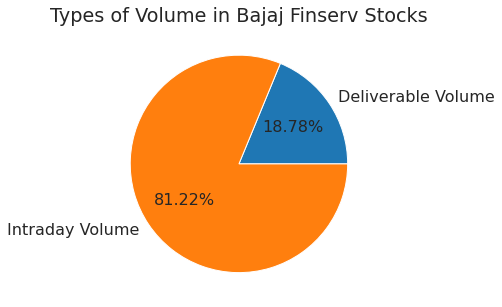

In [59]:
piechart_vars = ['Deliverable Volume', 'Intraday Volume'];
piechart_values = [bajaj_df1['Deliverable Volume'].sum(), bajaj_df1['Intraday Volume'].sum()]
plt.pie(piechart_values, labels = piechart_vars, autopct="%1.2f%%");
plt.title('Types of Volume in Bajaj Finserv Stocks')

In [60]:
# Top 5 trades that happened in Bajaj Finserv stock from 2019 till 2021, with the prices.
bajaj_df1.sort_values(by='Trades', ascending=False).head()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Intraday Volume
389,2020-11-20,7823.40,7843.00,8588.65,7843.00,8548.8,8542.60,8258.00,4110412,3.394379e+15,312959.0,439796,0.1070,3670616
390,2020-11-23,8542.60,8710.00,8982.65,8621.00,8700.1,8774.35,8788.34,3607587,3.170471e+15,309075.0,592734,0.1643,3014853
267,2020-06-02,4763.20,4793.95,5238.00,4742.65,5216.0,5184.70,5011.28,2693375,1.349726e+15,293610.0,408098,0.1515,2285277
280,2020-06-19,5427.55,5450.00,5970.30,5443.80,5925.0,5899.80,5699.38,3595572,2.049252e+15,270280.0,875036,0.2434,2720536
388,2020-11-19,7789.95,7789.95,8199.90,7750.00,7803.0,7823.40,8004.76,3387040,2.711244e+15,260576.0,374277,0.1105,3012763


In [61]:
# Top 5 highest trades
bajaj_df1.sort_values(by='Trades', ascending=False).head()['High']

389    8588.65
390    8982.65
267    5238.00
280    5970.30
388    8199.90
Name: High, dtype: float64

In [62]:
# Top 5 highest prices
high_10_price = bajaj_df1.sort_values(by='High', ascending=False).head(10)
high_10_price

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Intraday Volume
495,2021-04-29,10489.30,10540.0,11300.00,10520.00,11175.45,11176.55,10980.40,1696498,1.862822e+15,165425.0,195324,0.1151,1501174
496,2021-04-30,11176.55,11000.0,11225.00,10868.70,11021.00,11041.65,11081.78,835355,9.257223e+14,85986.0,129995,0.1556,705360
494,2021-04-28,10091.35,10200.0,10615.95,10151.15,10480.00,10489.30,10445.96,1113881,1.163556e+15,126354.0,133587,0.1199,980294
447,2021-02-15,10278.80,10330.2,10579.00,10280.00,10500.00,10537.70,10486.75,536406,5.625157e+14,50301.0,69675,0.1299,466731
448,2021-02-16,10537.70,10500.0,10532.00,10361.00,10460.00,10460.60,10444.86,358604,3.745570e+14,34451.0,30458,0.0849,328146
449,2021-02-17,10460.60,10420.0,10498.80,10112.20,10195.00,10185.65,10260.60,582259,5.974325e+14,57424.0,136169,0.2339,446090
459,2021-03-03,9877.00,9926.4,10444.95,9890.40,10369.30,10395.60,10216.33,504122,5.150275e+14,62530.0,115205,0.2285,388917
451,2021-02-19,10198.95,10150.0,10427.65,10140.00,10237.95,10250.45,10247.84,623343,6.387922e+14,52771.0,91996,0.1476,531347
445,2021-02-11,10227.95,10105.0,10417.90,10105.00,10220.05,10216.65,10275.38,715538,7.352428e+14,58617.0,74057,0.1035,641481
455,2021-02-25,10199.60,10340.0,10377.95,10131.60,10234.00,10264.45,10275.00,354802,3.645591e+14,39408.0,69338,0.1954,285464


Text(0.5, 1.0, '10 Highest price of Bajaj Finserv Stock')

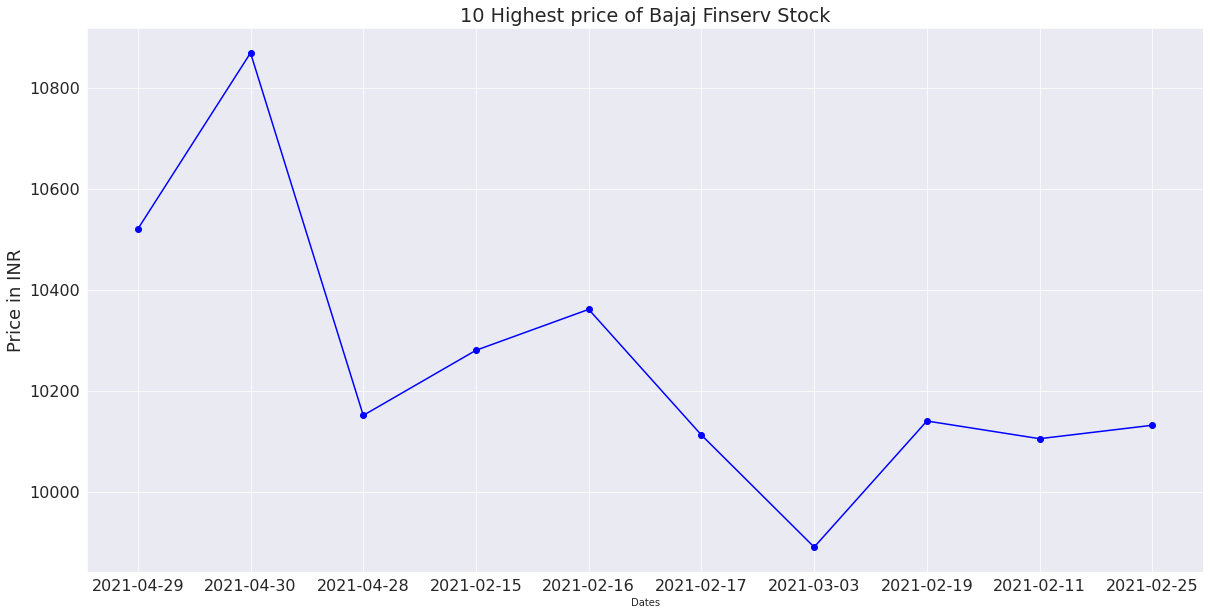

In [77]:
plt.figure(figsize = (20,10));
plt.plot(high_10_price.Date, high_10_price.Low,'o-b');
plt.xlabel('Dates', size=10);
plt.ylabel('Price in INR', size=18);
plt.title('10 Highest price of Bajaj Finserv Stock')

In [67]:
# Top 10 Lowest Price
Low_10_price= bajaj_df1.sort_values(by='Low', ascending=True).head(10)
Low_10_price

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Intraday Volume
263,2020-05-27,4097.25,4100.0,4276.95,3985.30,4250.00,4258.05,4144.52,2498693,1.035587e+15,193792.0,420201,0.1682,2078492
262,2020-05-26,4315.55,4360.0,4400.00,4051.80,4095.20,4097.25,4189.02,1575820,6.601142e+14,165078.0,411544,0.2612,1164276
261,2020-05-22,4539.20,4509.1,4578.45,4087.00,4330.00,4315.55,4299.75,2725018,1.171690e+15,256385.0,486592,0.1786,2238426
223,2020-03-24,4621.05,4900.0,5080.00,4160.25,4600.00,4497.75,4551.60,1558786,7.094971e+14,209363.0,352137,0.2259,1206649
265,2020-05-29,4285.95,4240.0,4428.95,4201.50,4392.55,4404.90,4372.54,1394430,6.097200e+14,101394.0,364969,0.2617,1029461
264,2020-05-28,4258.05,4250.0,4325.00,4211.85,4280.00,4285.95,4276.94,1247257,5.334449e+14,109551.0,222025,0.1780,1025232
243,2020-04-27,4389.80,4430.2,4670.00,4288.00,4661.60,4617.50,4516.10,1133888,5.120751e+14,121200.0,208511,0.1839,925377
231,2020-04-07,4510.75,4620.0,4818.80,4329.05,4771.95,4724.90,4495.38,1130738,5.083093e+14,201918.0,251431,0.2224,879307
242,2020-04-24,4729.60,4675.0,4675.00,4365.00,4410.00,4389.80,4479.98,1022043,4.578734e+14,130334.0,331038,0.3239,691005
224,2020-03-25,4497.75,4450.0,4920.00,4400.05,4902.00,4830.30,4698.82,797273,3.746241e+14,135939.0,177677,0.2229,619596


Text(0.5, 1.0, '10 lowest price of Bajaj Finserv Stock')

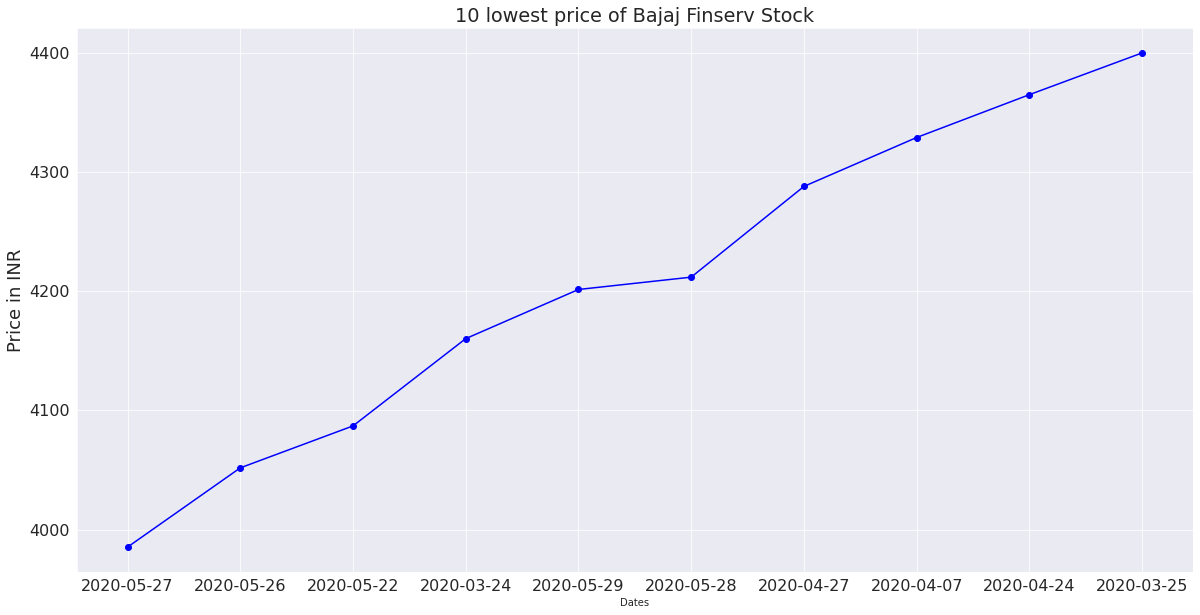

In [76]:
plt.figure(figsize = (20,10));
plt.plot(Low_10_price.Date, Low_10_price.Low,'o-b');
plt.xlabel('Dates', size=10);
plt.ylabel('Price in INR', size=18);
plt.title('10 lowest price of Bajaj Finserv Stock')

In [69]:
#Highest turover for Bajaj Finserv in 2019-2021
bajaj_df1.sort_values(by='Turnover', ascending=False).head(1)

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Intraday Volume
389,2020-11-20,7823.4,7843.0,8588.65,7843.0,8548.8,8542.6,8258.0,4110412,3.394379e+15,312959.0,439796,0.107,3670616


Increase in deliverable % shows a strong sign that long term investors are interested (entering) in this particular stock.

In [70]:
bajaj_df1.sort_values(by='%Deliverble', ascending = False).head(5)

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Intraday Volume
177,2020-01-17,9622.15,9614.0,9740.3,9601.0,9725.00,9715.00,9678.16,284129,2.749845e+14,24884.0,169199,0.5955,114930
140,2019-11-26,9175.00,9170.0,9215.0,9089.6,9121.35,9121.30,9149.88,295094,2.700076e+14,34027.0,159844,0.5417,135250
36,2019-06-21,8417.85,8382.0,8459.0,8363.5,8383.00,8392.45,8406.07,230915,1.941088e+14,27015.0,123068,0.5330,107847
21,2019-05-30,8131.75,8150.0,8260.0,8120.0,8199.90,8226.90,8207.64,211411,1.735185e+14,16814.0,103128,0.4878,108283
19,2019-05-28,8213.05,8200.0,8242.5,8069.5,8100.00,8128.55,8145.26,263409,2.145536e+14,29858.0,126208,0.4791,137201


In [71]:
# Moving Averages
bajaj_ma = bajaj_df1
bajaj_ma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                497 non-null    object 
 1   Prev Close          497 non-null    float64
 2   Open                497 non-null    float64
 3   High                497 non-null    float64
 4   Low                 497 non-null    float64
 5   Last                497 non-null    float64
 6   Close               497 non-null    float64
 7   VWAP                497 non-null    float64
 8   Volume              497 non-null    int64  
 9   Turnover            497 non-null    float64
 10  Trades              497 non-null    float64
 11  Deliverable Volume  497 non-null    int64  
 12  %Deliverble         497 non-null    float64
 13  Intraday Volume     497 non-null    int64  
dtypes: float64(10), int64(3), object(1)
memory usage: 54.5+ KB


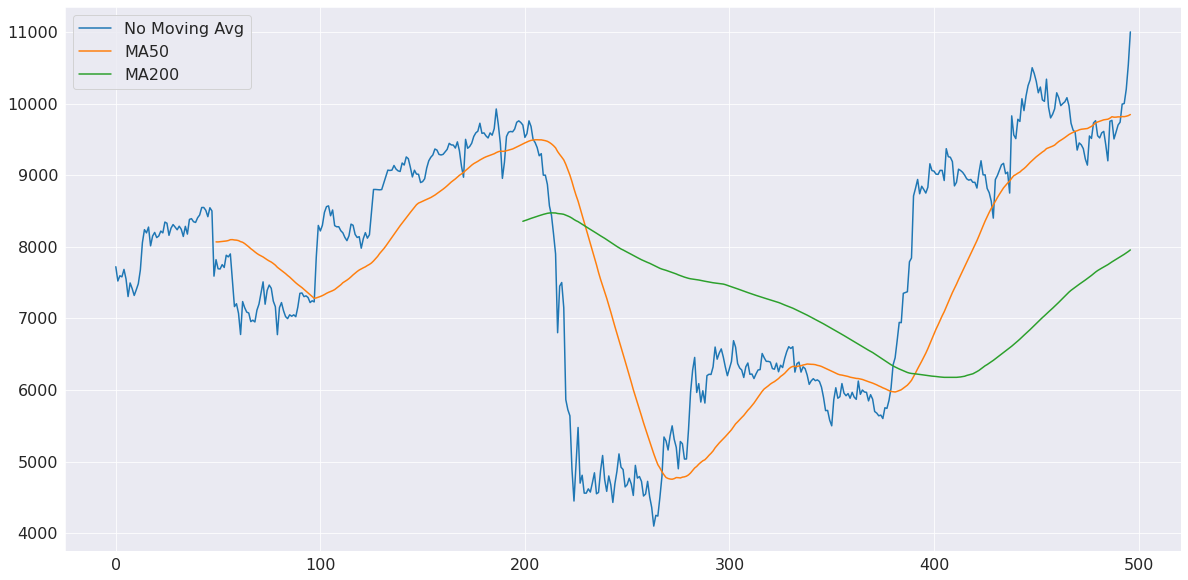

In [75]:
bajaj_ma['Open'].plot(label="No Moving Avg",figsize=(20,10))
bajaj_ma['MA50'] = bajaj_ma['Open'].rolling(50).mean()
bajaj_ma['MA50'].plot(label='MA50')
bajaj_ma['MA200'] = bajaj_ma['Open'].rolling(200).mean()
bajaj_ma['MA200'].plot(label='MA200')
plt.legend()

In [79]:
# %Change - Calculating and Adding Returns column
bajaj_ma['Returns'] = (bajaj_ma['Close']/ bajaj_ma['Close'].shift(1)) - 1
bajaj_ma.head()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Intraday Volume,MA50,MA200,Returns
0,2019-04-30,7721.25,7721.25,7730.00,7449.15,7515.0,7520.45,7582.77,253399,1.921466e+14,22564.0,99859,0.3941,153540,NaN,NaN,NaN
1,2019-05-02,7520.45,7522.00,7625.00,7500.85,7595.0,7578.85,7581.62,103551,7.850848e+13,13008.0,12542,0.1211,91009,NaN,NaN,0.007765
2,2019-05-03,7578.85,7595.00,7669.90,7590.00,7610.0,7624.20,7633.59,80422,6.139088e+13,10009.0,14642,0.1821,65780,NaN,NaN,0.005984
3,2019-05-06,7624.20,7580.00,7699.75,7557.60,7684.8,7667.95,7645.28,118824,9.084427e+13,13727.0,21265,0.1790,97559,NaN,NaN,0.005738
4,2019-05-07,7667.95,7684.00,7698.75,7525.00,7553.0,7561.95,7609.73,103553,7.880102e+13,15771.0,24334,0.2350,79219,NaN,NaN,-0.013824


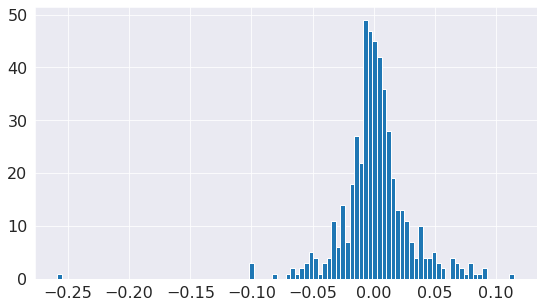

In [81]:
bajaj_ma['Returns'].hist(bins=100)

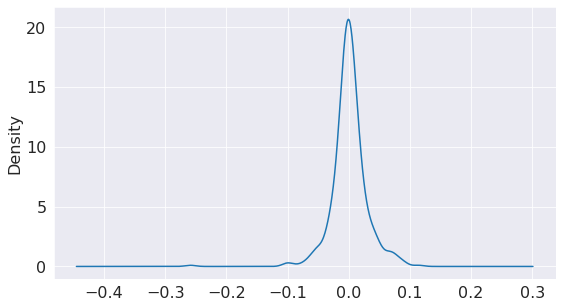

In [83]:
# Probablity density
bajaj_ma['Returns'].plot(kind='kde', label='Bajaj Finserv')

In [84]:
# Calculating Cumulative Return and adding a new column
bajaj_ma['Cumulative Return'] = (1 + bajaj_ma['Returns']).cumprod()
bajaj_ma.head()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Intraday Volume,MA50,MA200,Returns,Cumulative Return
0,2019-04-30,7721.25,7721.25,7730.00,7449.15,7515.0,7520.45,7582.77,253399,1.921466e+14,22564.0,99859,0.3941,153540,NaN,NaN,NaN,NaN
1,2019-05-02,7520.45,7522.00,7625.00,7500.85,7595.0,7578.85,7581.62,103551,7.850848e+13,13008.0,12542,0.1211,91009,NaN,NaN,0.007765,1.007765
2,2019-05-03,7578.85,7595.00,7669.90,7590.00,7610.0,7624.20,7633.59,80422,6.139088e+13,10009.0,14642,0.1821,65780,NaN,NaN,0.005984,1.013796
3,2019-05-06,7624.20,7580.00,7699.75,7557.60,7684.8,7667.95,7645.28,118824,9.084427e+13,13727.0,21265,0.1790,97559,NaN,NaN,0.005738,1.019613
4,2019-05-07,7667.95,7684.00,7698.75,7525.00,7553.0,7561.95,7609.73,103553,7.880102e+13,15771.0,24334,0.2350,79219,NaN,NaN,-0.013824,1.005518


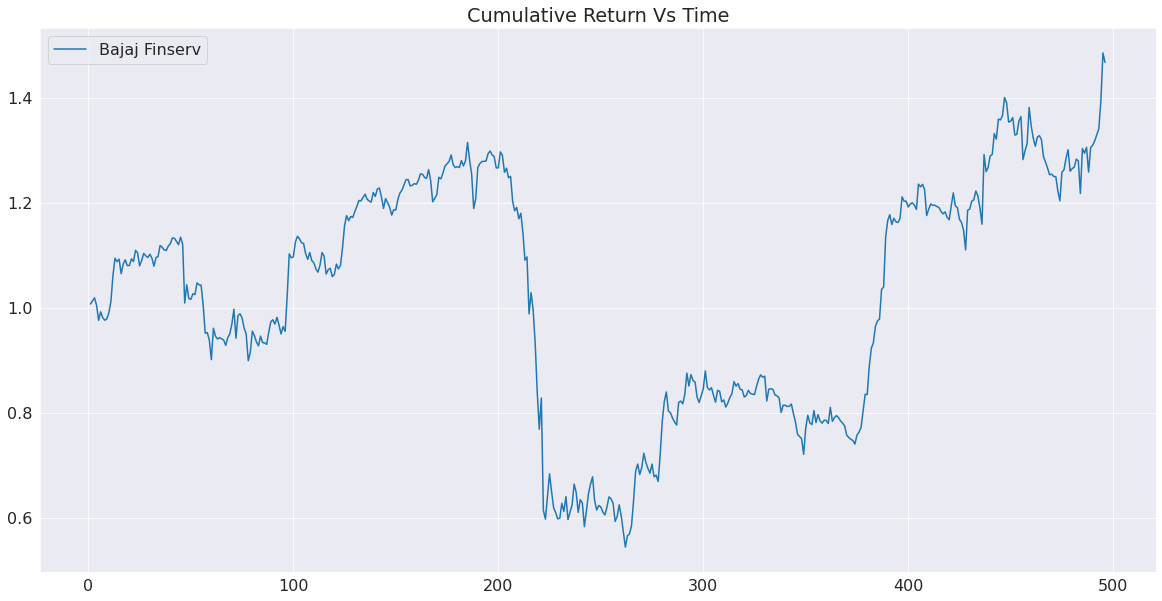

In [86]:
bajaj_ma['Cumulative Return'].plot(label='Bajaj Finserv', figsize=(20,10))
plt.title("Cumulative Return Vs Time")
plt.legend()

In [87]:
bajaj_df2 = bajaj_df
bajaj_df2.head()

,index,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,745,2011-06-01,518.40,521.8,528.95,517.1,521.10,521.05,522.81,113360,5.926609e+12,4155.0,34098,0.3008
1,746,2011-06-02,521.05,518.8,519.85,504.0,514.95,512.45,513.71,62967,3.234650e+12,2437.0,21069,0.3346
2,747,2011-06-03,512.45,512.5,520.00,506.0,507.10,508.40,513.11,36445,1.870040e+12,1754.0,10702,0.2936
3,748,2011-06-06,508.40,508.0,508.00,496.0,502.25,502.25,501.92,33537,1.683281e+12,1346.0,14215,0.4239
4,749,2011-06-07,502.25,503.0,552.00,503.0,546.50,545.50,536.79,1237385,6.642112e+13,36245.0,216387,0.1749


In [88]:
bajaj_df2 =  bajaj_df2.drop('index', axis=1)
bajaj_df2.head()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2011-06-01,518.40,521.8,528.95,517.1,521.10,521.05,522.81,113360,5.926609e+12,4155.0,34098,0.3008
1,2011-06-02,521.05,518.8,519.85,504.0,514.95,512.45,513.71,62967,3.234650e+12,2437.0,21069,0.3346
2,2011-06-03,512.45,512.5,520.00,506.0,507.10,508.40,513.11,36445,1.870040e+12,1754.0,10702,0.2936
3,2011-06-06,508.40,508.0,508.00,496.0,502.25,502.25,501.92,33537,1.683281e+12,1346.0,14215,0.4239
4,2011-06-07,502.25,503.0,552.00,503.0,546.50,545.50,536.79,1237385,6.642112e+13,36245.0,216387,0.1749


In [89]:
start_date = "2019-04-30"
end_date = "2021-04-30"
mask = (bajaj_df2['Date'] >= start_date) & (bajaj_df2['Date'] <= end_date)
bajaj_df2 = bajaj_df2.loc[mask]
bajaj_df2

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
1959,2019-04-30,7721.25,7721.25,7730.00,7449.15,7515.00,7520.45,7582.77,253399,1.921466e+14,22564.0,99859,0.3941
1960,2019-05-02,7520.45,7522.00,7625.00,7500.85,7595.00,7578.85,7581.62,103551,7.850848e+13,13008.0,12542,0.1211
1961,2019-05-03,7578.85,7595.00,7669.90,7590.00,7610.00,7624.20,7633.59,80422,6.139088e+13,10009.0,14642,0.1821
1962,2019-05-06,7624.20,7580.00,7699.75,7557.60,7684.80,7667.95,7645.28,118824,9.084427e+13,13727.0,21265,0.1790
1963,2019-05-07,7667.95,7684.00,7698.75,7525.00,7553.00,7561.95,7609.73,103553,7.880102e+13,15771.0,24334,0.2350
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2451,2021-04-26,9916.65,9992.00,10125.00,9902.20,10000.85,10001.75,9995.72,419596,4.194163e+14,45113.0,77816,0.1855
2452,2021-04-27,10001.75,10000.00,10133.00,9964.70,10133.00,10091.35,10036.76,342847,3.441072e+14,40414.0,77723,0.2267
2453,2021-04-28,10091.35,10200.00,10615.95,10151.15,10480.00,10489.30,10445.96,1113881,1.163556e+15,126354.0,133587,0.1199
2454,2021-04-29,10489.30,10540.00,11300.00,10520.00,11175.45,11176.55,10980.40,1696498,1.862822e+15,165425.0,195324,0.1151


In [90]:
bajaj_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497 entries, 1959 to 2455
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                497 non-null    object 
 1   Prev Close          497 non-null    float64
 2   Open                497 non-null    float64
 3   High                497 non-null    float64
 4   Low                 497 non-null    float64
 5   Last                497 non-null    float64
 6   Close               497 non-null    float64
 7   VWAP                497 non-null    float64
 8   Volume              497 non-null    int64  
 9   Turnover            497 non-null    float64
 10  Trades              497 non-null    float64
 11  Deliverable Volume  497 non-null    int64  
 12  %Deliverble         497 non-null    float64
dtypes: float64(10), int64(2), object(1)
memory usage: 54.4+ KB


In [91]:
# Converting Date into Datetime
bajaj_df2['Date'] = pd.to_datetime(bajaj_df2['Date'])
bajaj_df2.head()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
1959,2019-04-30,7721.25,7721.25,7730.00,7449.15,7515.0,7520.45,7582.77,253399,1.921466e+14,22564.0,99859,0.3941
1960,2019-05-02,7520.45,7522.00,7625.00,7500.85,7595.0,7578.85,7581.62,103551,7.850848e+13,13008.0,12542,0.1211
1961,2019-05-03,7578.85,7595.00,7669.90,7590.00,7610.0,7624.20,7633.59,80422,6.139088e+13,10009.0,14642,0.1821
1962,2019-05-06,7624.20,7580.00,7699.75,7557.60,7684.8,7667.95,7645.28,118824,9.084427e+13,13727.0,21265,0.1790
1963,2019-05-07,7667.95,7684.00,7698.75,7525.00,7553.0,7561.95,7609.73,103553,7.880102e+13,15771.0,24334,0.2350


In [92]:
bajaj_df2 = bajaj_df2.set_index('Date')
bajaj_df2.index

DatetimeIndex(['2019-04-30', '2019-05-02', '2019-05-03', '2019-05-06',
               '2019-05-07', '2019-05-08', '2019-05-09', '2019-05-10',
               '2019-05-13', '2019-05-14',
               ...
               '2021-04-16', '2021-04-19', '2021-04-20', '2021-04-22',
               '2021-04-23', '2021-04-26', '2021-04-27', '2021-04-28',
               '2021-04-29', '2021-04-30'],
              dtype='datetime64[ns]', name='Date', length=497, freq=None)

In [93]:
# Finding data for a month
bajaj_df2['2019-05'].head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,
2019-05-02,7520.45,7522.0,7625.00,7500.85,7595.0,7578.85,7581.62,103551,7.850848e+13,13008.0,12542,0.1211
2019-05-03,7578.85,7595.0,7669.90,7590.00,7610.0,7624.20,7633.59,80422,6.139088e+13,10009.0,14642,0.1821
2019-05-06,7624.20,7580.0,7699.75,7557.60,7684.8,7667.95,7645.28,118824,9.084427e+13,13727.0,21265,0.1790
2019-05-07,7667.95,7684.0,7698.75,7525.00,7553.0,7561.95,7609.73,103553,7.880102e+13,15771.0,24334,0.2350
2019-05-08,7561.95,7550.0,7551.00,7312.30,7345.0,7345.75,7403.36,230383,1.705609e+14,30277.0,59811,0.2596


In [94]:
# Average price for the month of April 2021
bajaj_df2['2021-04'].Close.mean()

9895.199999999997

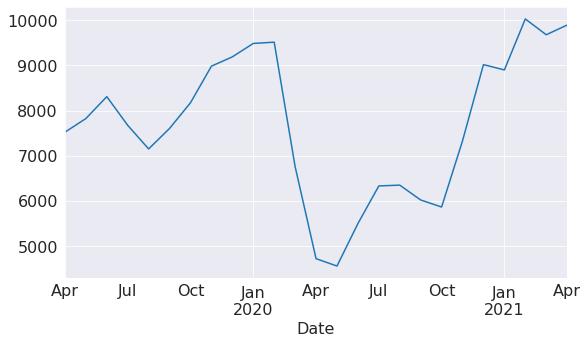

In [95]:
# Monthly average of close price
bajaj_df2.Close.resample('M').mean()
bajaj_df2.Close.resample('M').mean().plot()

In [96]:
# Finding last business day for each month
bajaj_df2.resample('M').last()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,
2019-04-30,7721.25,7721.25,7730.00,7449.15,7515.00,7520.45,7582.77,253399,1.921466e+14,22564.0,99859,0.3941
2019-05-31,8226.90,8219.00,8279.00,8152.65,8194.00,8187.95,8214.61,252199,2.071716e+14,25099.0,86018,0.3411
2019-06-30,8443.90,8443.90,8557.85,8423.80,8549.90,8524.65,8488.76,224278,1.903843e+14,27897.0,89954,0.4011
2019-07-31,7078.05,7088.00,7123.20,6895.00,7089.90,7097.85,7024.59,356118,2.501583e+14,41618.0,39244,0.1102
2019-08-31,6979.85,6997.00,7146.55,6965.00,7122.05,7119.55,7055.35,472409,3.333009e+14,50448.0,83688,0.1772
2019-09-30,8550.35,8560.00,8668.80,8410.35,8497.90,8513.00,8543.45,462717,3.953201e+14,53309.0,93708,0.2025
2019-10-31,8082.40,8120.00,8241.95,8100.00,8130.00,8134.35,8179.30,423287,3.462192e+14,36910.0,175782,0.4153
2019-11-30,9240.10,9230.00,9235.80,9095.30,9118.90,9110.25,9155.10,148877,1.362984e+14,21054.0,38263,0.2570
2019-12-31,9439.20,9422.40,9444.95,9379.00,9420.00,9393.35,9415.62,116732,1.099104e+14,11628.0,33658,0.2883


In [97]:
# Get the last business day of each Quarter from April-2019
bajaj_df2.resample('Q').last()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,
2019-06-30,8443.90,8443.90,8557.85,8423.80,8549.90,8524.65,8488.76,224278,1.903843e+14,27897.0,89954,0.4011
2019-09-30,8550.35,8560.00,8668.80,8410.35,8497.90,8513.00,8543.45,462717,3.953201e+14,53309.0,93708,0.2025
2019-12-31,9439.20,9422.40,9444.95,9379.00,9420.00,9393.35,9415.62,116732,1.099104e+14,11628.0,33658,0.2883
2020-03-31,4661.15,4810.00,4879.55,4430.00,4600.00,4591.20,4562.22,1156179,5.274737e+14,201921.0,290947,0.2516
2020-06-30,5890.20,5990.00,6043.65,5815.80,5833.30,5845.15,5896.32,976674,5.758783e+14,96510.0,71495,0.0732
2020-09-30,5876.70,5885.00,5929.00,5820.00,5851.00,5852.35,5866.40,375600,2.203421e+14,34577.0,28212,0.0751
2020-12-31,8961.70,8949.00,9030.00,8840.00,8885.40,8906.35,8930.62,476050,4.251420e+14,39943.0,120692,0.2535
2021-03-31,9502.35,9512.35,9715.60,9450.00,9677.85,9668.60,9621.86,424140,4.081015e+14,57784.0,154494,0.3643
2021-06-30,11176.55,11000.00,11225.00,10868.70,11021.00,11041.65,11081.78,835355,9.257223e+14,85986.0,129995,0.1556


In [98]:
# All three methord gives the percentage change
bajaj_df2['Return'] = bajaj_df2['Close'].pct_change(1)
bajaj_df2.head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Return
Date,,,,,,,,,,,,,
2019-04-30,7721.25,7721.25,7730.00,7449.15,7515.0,7520.45,7582.77,253399,1.921466e+14,22564.0,99859,0.3941,NaN
2019-05-02,7520.45,7522.00,7625.00,7500.85,7595.0,7578.85,7581.62,103551,7.850848e+13,13008.0,12542,0.1211,0.007765
2019-05-03,7578.85,7595.00,7669.90,7590.00,7610.0,7624.20,7633.59,80422,6.139088e+13,10009.0,14642,0.1821,0.005984
2019-05-06,7624.20,7580.00,7699.75,7557.60,7684.8,7667.95,7645.28,118824,9.084427e+13,13727.0,21265,0.1790,0.005738
2019-05-07,7667.95,7684.00,7698.75,7525.00,7553.0,7561.95,7609.73,103553,7.880102e+13,15771.0,24334,0.2350,-0.013824


In [99]:
bajaj_df2.tail()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Return
Date,,,,,,,,,,,,,
2021-04-26,9916.65,9992.0,10125.00,9902.20,10000.85,10001.75,9995.72,419596,4.194163e+14,45113.0,77816,0.1855,0.008582
2021-04-27,10001.75,10000.0,10133.00,9964.70,10133.00,10091.35,10036.76,342847,3.441072e+14,40414.0,77723,0.2267,0.008958
2021-04-28,10091.35,10200.0,10615.95,10151.15,10480.00,10489.30,10445.96,1113881,1.163556e+15,126354.0,133587,0.1199,0.039435
2021-04-29,10489.30,10540.0,11300.00,10520.00,11175.45,11176.55,10980.40,1696498,1.862822e+15,165425.0,195324,0.1151,0.065519
2021-04-30,11176.55,11000.0,11225.00,10868.70,11021.00,11041.65,11081.78,835355,9.257223e+14,85986.0,129995,0.1556,-0.012070


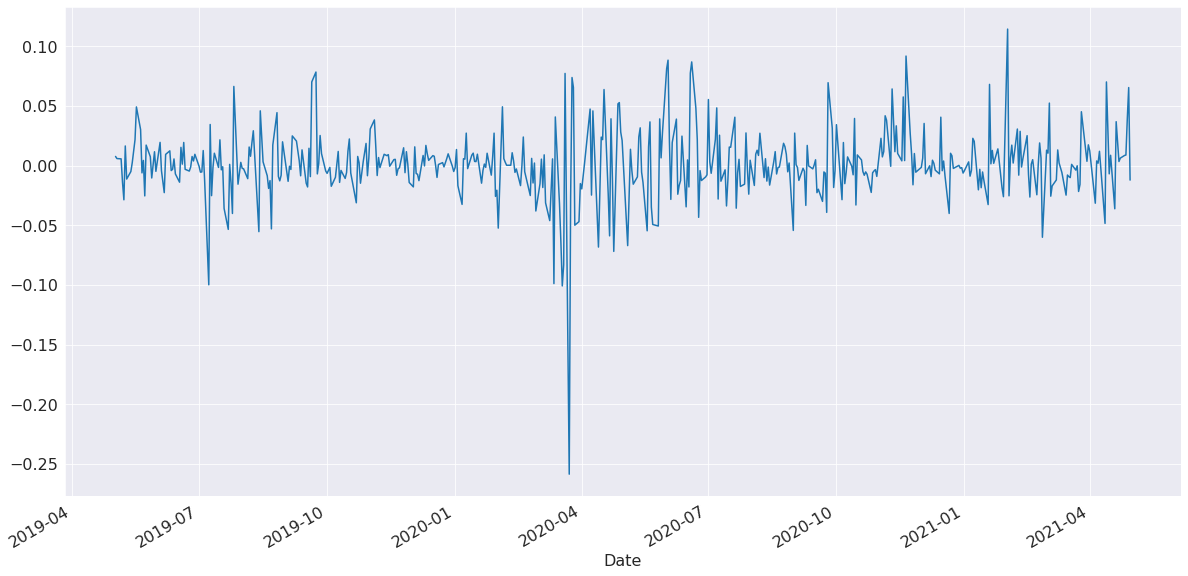

In [102]:
bajaj_df2['Return'].plot(figsize=(20,10))

In [103]:
# Calculating monthly return
monthly_return = bajaj_df2['Close'].resample('M').ffill().pct_change()
monthly_return

Date
2019-04-30         NaN
2019-05-31    0.088758
2019-06-30    0.041121
2019-07-31   -0.167373
2019-08-31    0.003057
2019-09-30    0.195722
2019-10-31   -0.044479
2019-11-30    0.119973
2019-12-31    0.031075
2020-01-31    0.005115
2020-02-29   -0.041376
2020-03-31   -0.492727
2020-04-30    0.111768
2020-05-31   -0.137030
2020-06-30    0.326965
2020-07-31    0.061718
2020-08-31   -0.002506
2020-09-30   -0.054601
2020-10-31   -0.047648
2020-11-30    0.571508
2020-12-31    0.016846
2021-01-31   -0.020615
2021-02-28    0.106142
2021-03-31    0.002073
2021-04-30    0.142011
Freq: M, Name: Close, dtype: float64

In [104]:
monthly_return.max()

0.5715080290661163

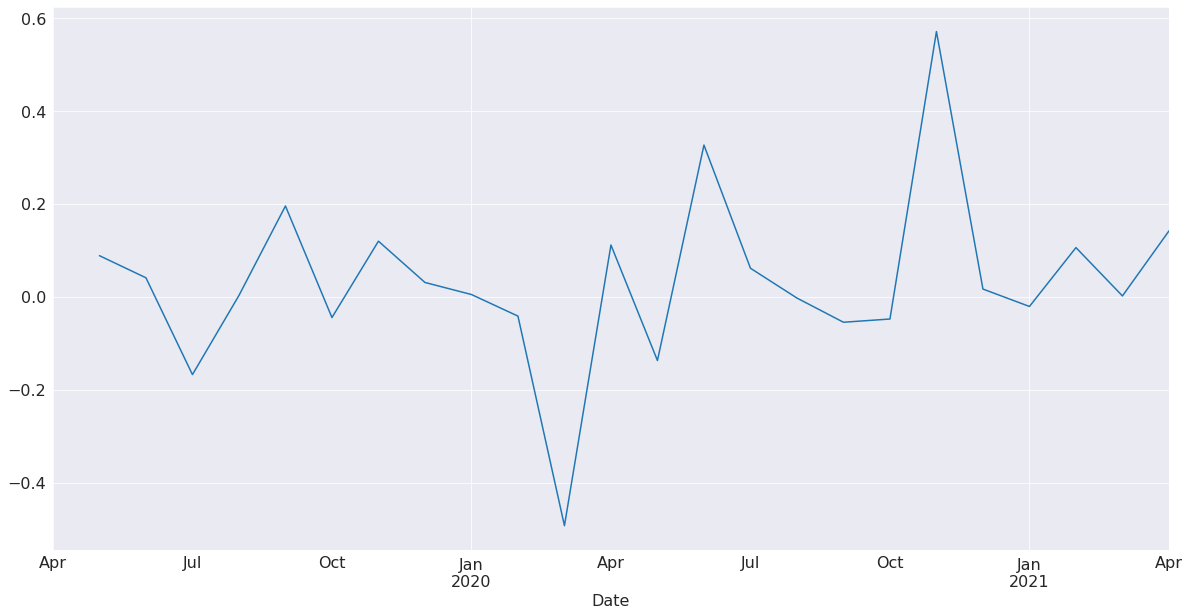

In [106]:
monthly_return.plot(figsize=(20,10))

In [ ]:
# Yearly return for 2020 and 2021 (April)
yearly_return = bajaj_df2['Close'].resample('Y').ffill().pct_change()
yearly_return

Date
2019-12-31         NaN
2020-12-31   -0.051845
2021-12-31    0.239750
Freq: A-DEC, Name: Close, dtype: float64

We are going to take few months market performance data from 2019 onwards.

Creating next month prediction.

In [187]:
date_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
bajaj_df = pd.read_csv('BAJAJFINSV.csv',  parse_dates = ['Date'], date_parser = date_parser)
bajaj_df = bajaj_df[bajaj_df['Date']>= '2020-09-01']
bajaj_df = bajaj_df.set_index('Date')
#The data is stationary
X_bajaj = bajaj_df.loc[:,['Trades']]
print(X_bajaj.shape)

(165, 1)


In [188]:
def future_dates(X):
    future_dates = [X.index[-1]+ DateOffset(days = x) for x in range(0,30)]
    future_dates_df = pd.DataFrame(index=future_dates[1:],columns = X.columns)
    return future_dates_df

bajaj_future_df = pd.concat([X_bajaj, future_dates(X_bajaj)])

SARIMAX model

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


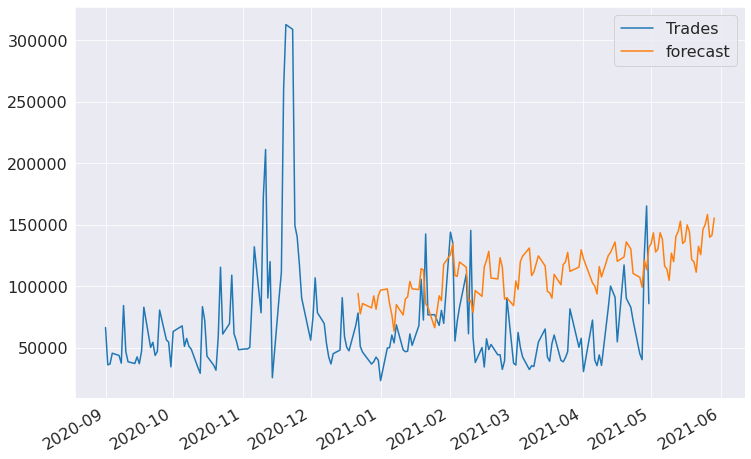

In [189]:
def model_train(X, order):
    model = sm.tsa.statespace.SARIMAX(X['Trades'],order=order,seasonal_order=(3,1,4,12))
    results = model.fit()
    return results

results = model_train(bajaj_future_df, order = (3,1,4))
bajaj_future_df['forecast'] = results.predict(start = 78 ,dynamic=True)
bajaj_future_df[['Trades','forecast']].plot(figsize=(12,8))

Bajaj Finserv future trades prediction